In [1]:
import gzip, pickle, numpy as np, matplotlib.pyplot as plt

### Loading Data

In [2]:
with gzip.open('data/mnist.pkl.gz', 'rb') as f:
    f = pickle._Unpickler(f)
    f.encoding = 'latin1'
    trainSet, validSet, testSet = f.load()
    mnistData = np.concatenate((trainSet[0], validSet[0], testSet[0]), axis=0)

### Helper Functions

In [3]:
def showImageSamples(imageset, n, shape=[28,28], col=3, width=16, dispopt='gray', random=True):
    row    = np.ceil(n / col)
    height = np.around(row * (width / col))
    plt.figure(figsize=(width, height))
    subplotIndex = 100 * row + 10 * col + 1
    for i in range(n):
        if random:
            img = imageset[np.random.randint(len(imageset), size=1)]
        else:
            img = imageset[i]
        plt.subplot(subplotIndex + i)
        plt.imshow(img.reshape(shape), cmap=dispopt)

### Principal Component Analysis

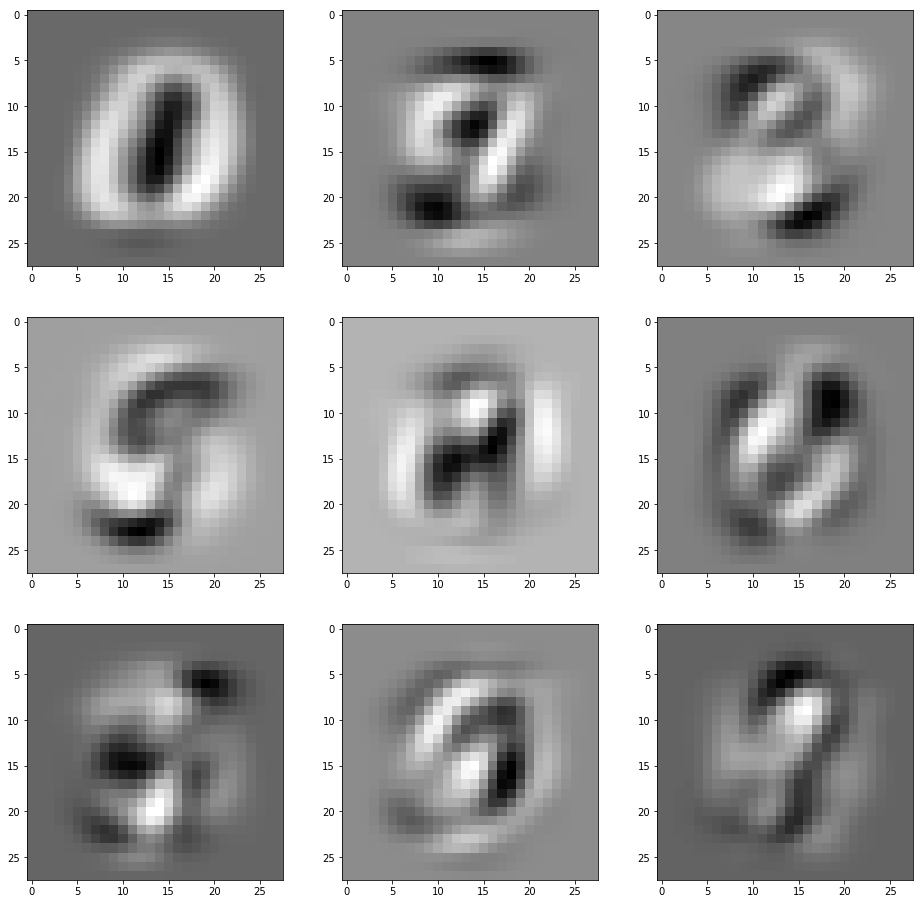

In [4]:
from gmmlib import dimReducePCA

# reduce the dimension of data to 2 using PCA
mnistData2D, eigenVectors, eigenValues = dimReducePCA(mnistData, 2)
showImageSamples(eigenVectors.T, 9, random=False)

In [5]:
# randomly pick coordinates as center of Gaussian distribution
def randinitMean(n, drange):
    mu = []
    for m in range(n):
        mu.append([np.random.uniform(drange[i]['MIN'], drange[i]['MAX']) for i in range(len(drange))])
    # return inf form of numpy.ndarray
    return np.asarray(mu)

In [6]:
def randinitCovariance(n):
    sigma = []
    for m in range(n):
        # randomly pick a direction
        angle = np.random.uniform(0, 2 * np.pi)
        # create eigen vector with the direction and direction orthogonal to it
        eigenVector = np.asarray([[np.cos(angle), np.sin(angle)],
                                  [np.cos(angle + np.pi/2), np.sin(angle + np.pi/2)]])
        # randomly generate eigen values
        eigenValue = abs(np.random.normal(size=2))
        # compose covariance matrix
        sigma.append(eigenVector.T.dot(np.diag(eigenValue).dot(eigenVector)))
    # return in form of numpy.ndarray
    return np.asarray(sigma)

Scatterplot:

In [19]:
def gmmplot(data, gmm):
    # plot data points
    plt.scatter(data[:, 0], data[:, 1], s=4)
    # plot Gaussian model
    color = 'rgb'
    for index, model in enumerate(gmm):
        plotGaussianModel2D(model['mean'], model['covariance'], colorPicker(index))


[[-2.5018218  -1.1671584 ]
 [ 0.9678589  -1.0645375 ]
 [-3.2098362   1.6060164 ]
 ...
 [-4.039958    2.373127  ]
 [-4.191199   -0.38781995]
 [ 1.1567981  -0.2576235 ]]


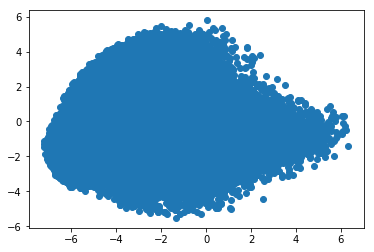

In [17]:
x0, x1 = np.zeros(len(mnistData2D)), np.zeros(len(mnistData2D))
for x in range(len(mnistData2D)):
    x0[x], x1[x] = mnistData2D[x][0], mnistData2D[x][1]
plt.scatter(x0, x1)
plt.show()